In [1]:
from modelos import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

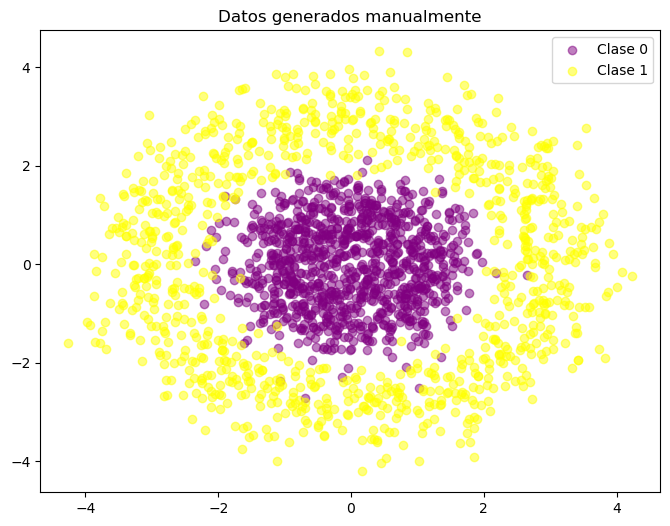

In [2]:
def make_classification(r0=1, r1=3, k=1000):
    """
    Creación de los datos
    """
    X1 = [np.array([r0*np.cos(t), r0*np.sin(t)]) for t in range(0,k)]
    X2 = [np.array([r1*np.cos(t), r1*np.sin(t)]) for t in range(0,k)]

    X = np.concatenate((X1,X2))
    n, d = X.shape
    Y = np.zeros(2*k)
    Y[k:] += 1
    noise = np.array([np.random.normal(0,1,2) for i in range(n)])
    X += 0.5*noise

    return X, Y

X, y = make_classification(r0=1, r1=2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X, y = make_classification(r0=1, r1=3)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:,1], color='purple', label='Clase 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:,1], color='yellow', label='Clase 1', alpha=0.5)
plt.title('Datos generados manualmente')
plt.legend()
plt.show()

# Aqui vamos a usar unos tests para ver como se comporta la red

In [3]:
# Ejemplo de uso
def test_backprop():
    # Creamos datos de ejemplo
    x = Variable(x_train)
    y_true = y_train  # One-hot encoding para 2 clases
    
    # Creamos una capa lineal
    linear = Linear(2, 2)
    
    # Forward pass
    hidden = linear(x)
    softmax = Softmax()
    output = softmax(hidden)
    
    # Calculamos la pérdida
    criterion = CrossEntropy()
    loss = criterion(y_true, output)
    
    # Backward pass
    loss.backward()
    
    # Verificamos que los gradientes se han calculado
    print("Gradiente en la salida:", output.gradiente)
    print("Gradiente en la capa oculta:", hidden.gradiente)
    print("Gradiente en la entrada:", x.gradiente)

In [4]:
test_backprop()

Gradiente en la salida: [[-7.09227774e-04 -5.05794008e-06]
 [ 3.15241299e-05  6.82761584e-04]
 [-1.99887657e-06 -7.12286838e-04]
 ...
 [-7.14097199e-04 -1.88514835e-07]
 [ 1.48401473e-04  5.65884242e-04]
 [ 1.98814074e-04  5.15471640e-04]]
Gradiente en la capa oculta: [[-7.09227774e-04 -5.05794008e-06]
 [ 3.15241299e-05  6.82761584e-04]
 [-1.99887657e-06 -7.12286838e-04]
 ...
 [-7.14097199e-04 -1.88514835e-07]
 [ 1.48401473e-04  5.65884242e-04]
 [ 1.98814074e-04  5.15471640e-04]]
Gradiente en la entrada: [[ 1.40023080e-03  1.19936620e-03]
 [ 2.12168959e-05  7.00440868e-04]
 [-8.31445594e-05 -7.83209029e-04]
 ...
 [ 1.41044416e-03  1.21301666e-03]
 [-2.23927174e-04  3.72798538e-04]
 [-3.29664950e-04  2.31476858e-04]]


In [18]:
def test_backprop_complex():
    #datos de entrada
    x = Variable(x_train)
    y_true = y_train

    #definimos la arquitectura
    #capa1: 2 neuronas entrada -> 4 neuronas ocultas
    linear1 = Linear(input_size=2, output_size=4)
    tanh = Tanh()

    # capa2: 4 neuronas ocultas -> 3 neuronas ocultas
    linear2 = Linear(input_size=4, output_size=3)
    relu = ReLU()

    # capa3: 3 neuronas -> 2 neuronas de salida
    linear3 = Linear(input_size=3, output_size=2)
    softmax = Softmax()

    # Forward pass
    # primera capa oculta con tanh
    hidden1 = linear1(x)
    hidden1_act = tanh(hidden1)

    # segunda capa oculta con ReLU
    hidden2 = linear2(hidden1_act)
    hidden2_act = relu(hidden2)

    # capa de salida con softmax
    output_linear = linear3(hidden2_act)
    output = softmax(output_linear)

    # calculamos la perdida
    criterion = CrossEntropy()
    loss = criterion(y_true, output)

    #backward pass
    loss.backward()

    # Imprimimos los resultados
    #print("\nResultados del forward pass:")
    #print("Salida de la red:", output.out)
    #print("Pérdida:", loss.out)
    #print("--------------------------------------------------")
    #print("\nPesos y gradientes de las capas lineales:")
    #print("Capa 1:")
    #print("Gradiente de los pesos:", linear1.grad_w)
    #print("Gradiente del bias:", linear1.grad_b)

    grads ={
        "W1":linear1.grad_w, "b1":linear1.grad_b,
        "W2":linear2.grad_w, "b2":linear2.grad_b,
        "w3":linear3.grad_w, "b3":linear3.grad_b
    }

    return grads

In [30]:
grads = test_backprop_complex()
grads["b3"]

array([-3.03002983e-05,  4.15247881e-05])

# Aquí ya hacemos uso de nuestra clase Sequential

In [3]:
f = Sequential(Linear(2,10), Tanh(), Linear(10,10), ReLU(), Linear(10,2), Softmax())

In [4]:
x = Variable(x_train)
pred = f(x)

In [5]:
pred.out[:10]

array([[9.32692073e-01, 6.73079266e-02],
       [9.66312778e-01, 3.36872225e-02],
       [6.54546260e-01, 3.45453740e-01],
       [9.99999501e-01, 4.99019388e-07],
       [9.45371567e-01, 5.46284328e-02],
       [4.92170310e-01, 5.07829690e-01],
       [9.99999564e-01, 4.36392291e-07],
       [8.59256544e-01, 1.40743456e-01],
       [7.62950786e-01, 2.37049214e-01],
       [7.77959793e-02, 9.22204021e-01]])

In [6]:
np.sum(pred.out[7])

1.0

In [7]:
criterion = CrossEntropy()
loss = criterion(y_train, pred)
loss.out

2.158250343554571

In [8]:
# veamos que tal clasifica hasta aca
from sklearn.metrics import classification_report
y_pred = np.argmax(pred.out, axis=1)
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.55      0.81      0.66       694
         1.0       0.65      0.35      0.45       706

    accuracy                           0.58      1400
   macro avg       0.60      0.58      0.55      1400
weighted avg       0.60      0.58      0.55      1400



# Ahora hagamos el backward

In [9]:
loss.backward()

In [10]:
f[0].w # pesos con los que inicializo el modelo

array([[ 0.03959461,  0.67993929,  0.22403324,  0.05751434,  0.17122268,
         1.17608252, -0.69036736, -0.36321238, -0.20018978, -0.9716452 ],
       [ 0.02901371, -1.1734096 ,  0.6697806 , -2.02641923,  0.84380251,
        -0.33045968,  0.63385063,  1.67566676, -2.07530637,  1.14231793]])

In [11]:
f[0].grad_w # gradiente

array([[-0.15807912,  0.01285833,  0.27138001, -0.21770252,  0.05537212,
         0.10784693, -0.08821151, -0.02652121, -0.08251839, -0.07490141],
       [-0.2477646 ,  0.0457164 ,  0.27267646, -0.08878502, -0.01876773,
         0.275426  , -0.16664416,  0.13572451, -0.03597778, -0.1070744 ]])

# aqui estamos probando paso por paso el adagrad

In [11]:
params = {
    "w1":f[0].w,
    "b1":f[0].b,
    "w2":f[2].w,
    "b2":f[2].b,
    "w3":f[4].w,
    "b3":f[4].b
}

grads = {
    "w1":f[0].grad_w,
    "b1":f[0].grad_b,
    "w2":f[2].grad_w,
    "b2":f[2].grad_b,
    "w3":f[4].grad_w,
    "b3":f[4].grad_b
}

In [12]:
# ahora utilizamos el optimizador
optimizador = AdagradOptimizer(learning_rate=0.1, epsilon=1e-8)
optimizador.update(params, grads)

print("Parametros actualizados")
for key in params:
    print(f"{key}: {params[key]}")

Parametros actualizados
w1: [[-0.2580933  -2.52475546 -2.01586273 -1.02863511 -1.00598036  0.22155411
   0.4946115  -0.47061735 -1.37073984  0.50753377]
 [-1.86118634  1.59261888 -0.37212019 -0.17200692 -0.84474411  1.09237123
   0.10333217 -0.01858971  0.27748922  0.18516742]]
b1: [-1.17632038 -0.50460552  1.44121482 -0.75603218 -0.23724969 -1.02619911
 -0.64933391  1.18441104 -0.47060612  1.25723103]
w2: [[-0.73755347  0.50120885  0.28573919  0.97957807 -0.13420019  0.95105084
   0.38958726 -0.52969724 -0.24451254 -0.75202745]
 [ 0.22511029 -1.0704853  -0.01114817 -0.04681174 -1.25402737 -0.65956349
   1.03048906  0.15600192  0.34614241  0.91908566]
 [ 0.40940972 -0.27186922  0.89103507 -0.57191289 -0.11835517  0.16103576
  -1.32081991  0.9456755  -0.51058764 -0.0090899 ]
 [ 0.78377415 -1.00758409  1.36372102 -0.59918001  0.90514358  0.54514316
   0.26563248  0.68906976  0.56963298  0.85377215]
 [ 0.88114356  0.62925787  1.28292072  0.38565292  0.19779068 -1.18983946
   1.19432813 -1

In [13]:
optimizador.apply_updates(f, params)

In [ ]:
f.params[1].w

array([[-0.2580933 , -2.52475546, -2.01586273, -1.02863511, -1.00598036,
         0.22155411,  0.4946115 , -0.47061735, -1.37073984,  0.50753377],
       [-1.86118634,  1.59261888, -0.37212019, -0.17200692, -0.84474411,
         1.09237123,  0.10333217, -0.01858971,  0.27748922,  0.18516742]])

# vamos a resumir más cosas

In [12]:
f.params[0].w

array([[ 0.03959461,  0.67993929,  0.22403324,  0.05751434,  0.17122268,
         1.17608252, -0.69036736, -0.36321238, -0.20018978, -0.9716452 ],
       [ 0.02901371, -1.1734096 ,  0.6697806 , -2.02641923,  0.84380251,
        -0.33045968,  0.63385063,  1.67566676, -2.07530637,  1.14231793]])

In [13]:
f.params[0].b

array([-1.47277055, -0.30412247,  0.11256112, -0.85214456,  0.17125536,
       -0.12832704, -2.28194522, -1.81786977, -0.37181496,  0.53256861])

In [14]:
f.params[4].w

array([[ 1.09639761,  1.22396179],
       [-0.56709185, -1.15578237],
       [-0.84903812,  1.42972482],
       [-0.57856647, -1.5663957 ],
       [-1.42367249, -1.62982764],
       [ 1.89864772,  0.83185911],
       [ 0.53389206,  0.32086933],
       [-0.62861347, -1.33512025],
       [-0.58105183, -1.4952146 ],
       [-0.25957744,  1.20478818]])

In [15]:
f.params[4].b

array([ 0.14931195, -0.08812098])

In [16]:
optimizador = AdagradOptimizer(learning_rate=0.1, epsilon=1e-8)
optimizador.update(f)

In [19]:
f.params[0].w

array([[ 0.13959461,  0.57993937,  0.12403324,  0.15751434,  0.0712227 ,
         1.07608253, -0.59036737, -0.26321242, -0.10018979, -0.87164522],
       [ 0.1290137 , -1.27340958,  0.56978061, -1.92641924,  0.94380246,
        -0.43045968,  0.73385062,  1.57566676, -1.9753064 ,  1.24231792]])

In [20]:
f.params[0].b

array([-1.37279556, -0.40411752,  0.21252516, -0.95212118,  0.07126264,
       -0.02835559, -2.18198   , -1.91786209, -0.27191196,  0.43258905])

In [21]:
f.params[4].w

array([[ 1.1963976 ,  1.32396178],
       [-0.66709185, -1.05578238],
       [-0.74903812,  1.32972483],
       [-0.67856647, -1.46639571],
       [-1.32367254, -1.52982768],
       [ 1.79864773,  0.93185911],
       [ 0.63389201,  0.42086928],
       [-0.72861347, -1.23512025],
       [-0.6810518 , -1.3952146 ],
       [-0.15957746,  1.30478817]])

In [22]:
f.params[4].b

array([0.04932017, 0.01187119])